In [9]:
# 서울 열린데이터 광장 > '서울특별시 공공자전거 대여이력 정보'
# 2024년 1분기 데이터 다운로드 받기(2024.01~03)

1. 일(day)별 자전거 이용건수는 어떻게 될까?
2. 대여시간대별, 요일별 자전거 이용건수는 어떻게 될까?
3. 주말, 평일 이용건수는 어떻게 될까?
4. 인기명소는 어디일까?

In [10]:
import pandas as pd
bikes_temp={}

for i in range(1,4):
    bikes_temp[i] = pd.read_csv(f'files\서울특별시 공공자전거 대여이력 정보_240{i}.csv', encoding='cp949')

In [11]:
for i in range(1,4):
    print(bikes_temp[i].shape)

(2053893, 17)
(2101129, 17)
(3250056, 17)


In [12]:
bikes_temp[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053893 entries, 0 to 2053892
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 266.4+ MB


In [13]:
bikes = pd.concat(bikes_temp, ignore_index=True)

In [14]:
bikes.index

RangeIndex(start=0, stop=7405078, step=1)

In [15]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거


In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 960.4+ MB


* 날짜 데이터 변경: pd.to_datetime(변수명)
* dt 액세서
    - 변수명.dt.year
    - 변수명.dt.month
    - 변수명.dt.hour
    - 변수명.dt.weekday(요일 0~6 : 월~일) 

In [17]:
# 일자별, 요일별, 주말구분별, 대여시간대별 따릉이 이용건수 파악
# 대여일, 일자, 요일, 대여시간대, 주말구분 컬럼 추가

bikes['대여일'] = pd.to_datetime(bikes['대여일시'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 1016.9+ MB


In [18]:
# 월, 일자, 시간대 컬럼 추가
bikes['월'] = bikes['대여일'].dt.month
bikes['일자'] = bikes['대여일'].dt.day
bikes['시간대'] = bikes['대여일'].dt.hour

In [19]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 21 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
 18  월         int32         
 19  일자        int32         
 20  시간대       int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(13)
memory usage: 1.1+ GB


In [20]:
bikes['요일_n'] = bikes['대여일'].dt.weekday
bikes['요일_n'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [21]:
bikes['요일_n'].value_counts().sort_index()

요일_n
0     977123
1    1088280
2    1173864
3    1147832
4    1146668
5     987407
6     883904
Name: count, dtype: int64

In [22]:
# 요일 컬럼 생성
weekdays = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
bikes['요일'] = bikes['요일_n'].map(weekdays)
bikes['요일'].unique()

array(['월', '화', '수', '목', '금', '토', '일'], dtype=object)

In [23]:
# 주말 구분 열 생성
weekend = {'월':'평일','화':'평일','수':'평일','목':'평일','금':'평일','토':'주말','일':'주말'}
bikes['주말 구분'] = bikes['요일'].map(weekend)
bikes['주말 구분'].value_counts()

주말 구분
평일    5533767
주말    1871311
Name: count, dtype: int64

In [24]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,월,일자,시간대,요일_n,요일,주말 구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월,평일
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월,평일
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월,평일
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월,평일
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월,평일


* 일자별 따릉이 이용건수

In [25]:
# 1월 일자별 대여현황
daily_ride_01 = bikes.query('월==1').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_01.head()

,일자,자전거번호
0,1,48927
1,2,89691
2,3,74474
3,4,93416
4,5,97979


Text(0.5, 1.0, '2024년 1월 일자별 현황')

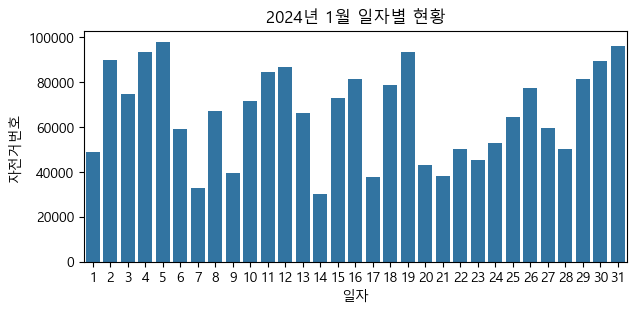

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(7,3))
sns.barplot(data=daily_ride_01, x='일자', y='자전거번호')
plt.title('2024년 1월 일자별 현황')

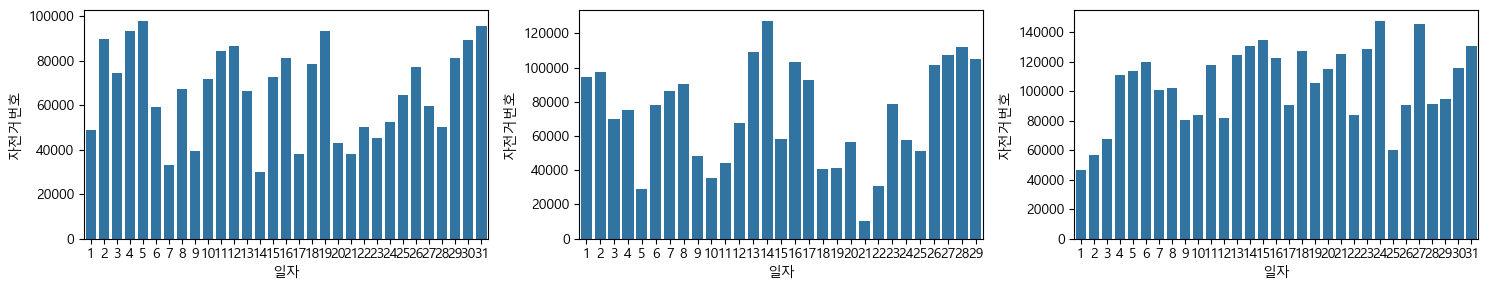

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

daily_ride_01 = bikes.query('월==1').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_02 = bikes.query('월==2').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_03 = bikes.query('월==3').groupby('일자', as_index=False)['자전거번호'].count()

fig, axes = plt.subplots(1,3,figsize=(15,3))

sns.barplot(data=daily_ride_01, x='일자', y='자전거번호', ax=axes[0])
sns.barplot(data=daily_ride_02, x='일자', y='자전거번호', ax=axes[1])
sns.barplot(data=daily_ride_03, x='일자', y='자전거번호', ax=axes[2])

plt.tight_layout()
plt.show()


In [28]:
# 대여시간대별 따릉이 이용건수
hourly_ride = bikes.groupby('시간대',as_index=False)[['자전거번호']].count()

In [29]:
# 요일별 따릉이 인원수
weekly_ride = bikes.groupby('요일',as_index=False)[['자전거번호']].count()

In [30]:
weekly_ride

,요일,자전거번호
0,금,1146668
1,목,1147832
2,수,1173864
3,월,977123
4,일,883904
5,토,987407
6,화,1088280


In [31]:
weekday_ride = bikes.groupby('주말 구분',as_index=False)[['자전거번호']].count()

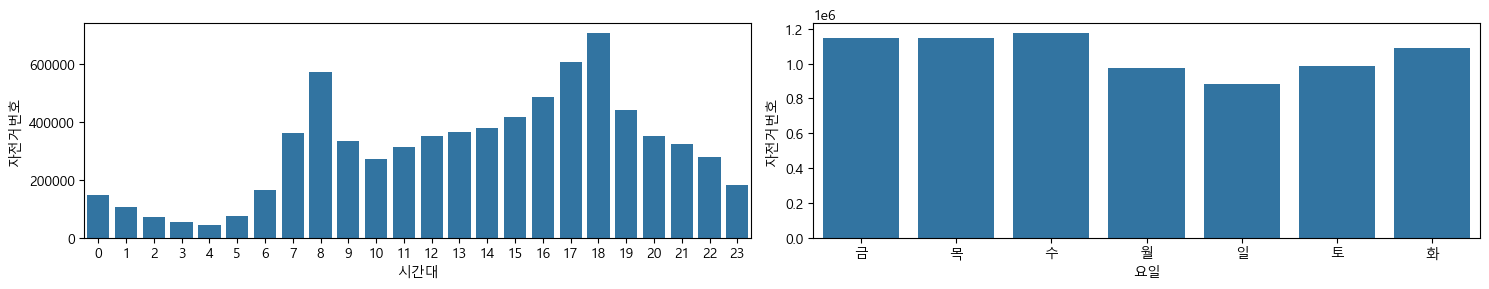

In [32]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

sns.barplot(data=hourly_ride, x='시간대', y='자전거번호', ax=axes[0])
sns.barplot(data=weekly_ride, x='요일', y='자전거번호', ax=axes[1])

plt.tight_layout()
plt.show()

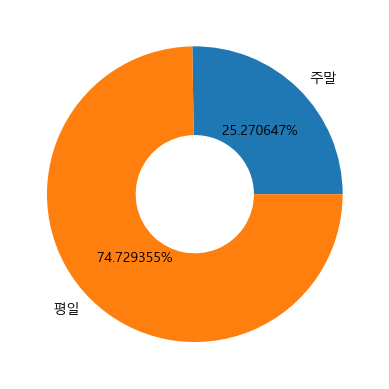

In [33]:
plt.pie(weekday_ride['자전거번호'],labels=weekday_ride['주말 구분'],autopct='% 1f%%', wedgeprops={'width':0.6})
plt.show()

In [34]:
# 대여시간대별 & 요일별 이용건수

hourly_weekday_ride = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count()
hourly_weekday_ride.head()

,시간대,요일,자전거번호
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,23361


<Axes: xlabel='시간대', ylabel='자전거번호'>

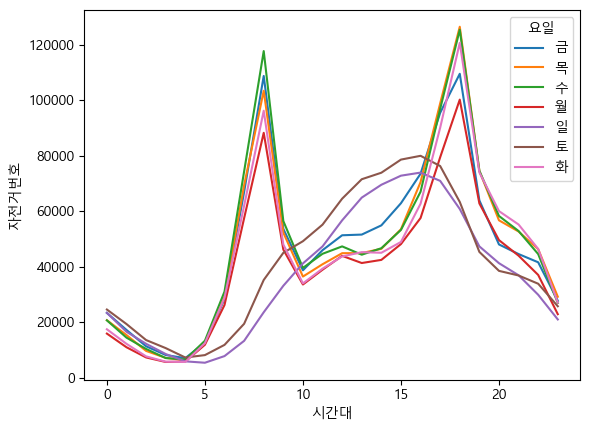

In [35]:
sns.lineplot(data=hourly_weekday_ride, x='시간대', y='자전거번호', hue='요일')

In [36]:
hourly_weekday_ride2 = bikes.pivot_table(index='시간대',columns='요일',values='자전거번호',aggfunc='count')

# 열 순서를 지정하여 재정열
hourly_weekday_ride2 = hourly_weekday_ride2.reindex(columns=['월','화','수','목','금','토','일'])
hourly_weekday_ride2

요일,월,화,수,목,금,토,일
시간대,,,,,,,
0,15891,17445,20657,20715,23351,24562,23361
1,10968,12197,14435,15369,17204,19326,16545
2,7293,7679,10355,9649,11316,13558,12211
3,5661,5773,7070,7143,8168,10661,8525
4,5823,5667,6533,6301,7037,7268,5884
5,11864,12452,13316,12380,12646,8138,5389
6,26191,28854,31027,29267,28336,11822,7786
7,57457,61946,74315,69323,66935,19417,13271
8,88228,96193,117672,103379,108701,35210,23574


<Axes: xlabel='요일', ylabel='시간대'>

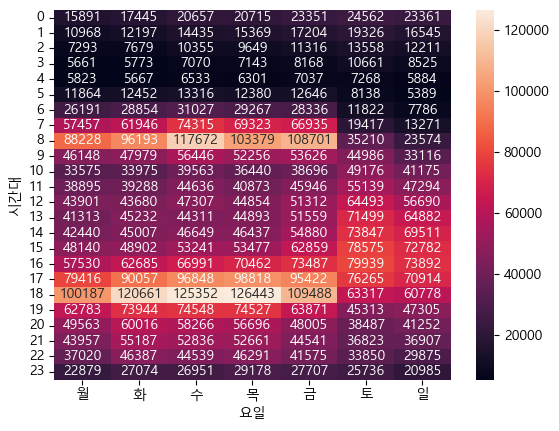

In [44]:
plt.Figure(figsize=(10,8))
sns.heatmap(data=hourly_weekday_ride2,annot=True, fmt='d')

In [38]:
hourly_weekday_ride3 = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count().unstack()
hourly_weekday_ride3

시간대    0          0
       1          0
       2          0
       3          0
       4          0
              ...  
자전거번호  163    26951
       164    22879
       165    20985
       166    25736
       167    27074
Length: 504, dtype: object

 # 인기 있는 대여소 top50
* 주말, 평일
* 데이터 다운로드 및 편집
     - data.seoul.go.kr > 서울특별시 공공데이터

In [39]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID', '자전거구분', '대여일', '월', '일자', '시간대', '요일_n', '요일', '주말 구분'],
      dtype='object')

In [40]:
bikes_weekend = bikes.groupby(['대여 대여소번호', '대여 대여소명', '주말 구분'])['자전거번호'].count().unstack()
# [[자전거번호]]라고 하면 '자전거번호'행이 가장 위에 생김

In [41]:
weekend50 = bikes_weekend.sort_values('주말',ascending=False).head(50).reset_index()

In [49]:
bike_shop = pd.read_csv('files\공공자전거 대여소 정보.csv', encoding='cp949')
bike_shop = bike_shop.rename(columns={'대여소\n번호':'대여소번호'})
bike_shop

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100
...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,강동구 천호대로201길,37.540043,127.150742
2762,4956,암사역사공원역 1번출구,강동구,강동구 고덕로27길 36,37.557568,127.140160
2763,4957,신명초교 교차로,강동구,강동구 길동 158-8,37.540436,127.148399
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,강동구 고덕동 490,37.559494,127.145126


In [50]:
bike_shop.columns

Index(['대여소번호', '보관소(대여소)명', '자치구', '상세주소', '위도', '경도'], dtype='object')

In [51]:
weekend50_total = pd.merge(weekend50,bike_shop,left_on='대여 대여소번호',right_on='대여소번호')

In [52]:
weekend50_total

,대여 대여소번호,대여 대여소명,주말,평일,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,4217,한강공원 망원나들목,9011.0,8691.0,4217,한강공원 망원나들목,마포구,마포구 망원동 462-8,37.555576,126.896889
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0,502,뚝섬유원지역 1번출구 앞,광진구,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192
2,2715,마곡나루역 2번 출구,6274.0,26543.0,2715,마곡나루역 2번 출구,강서구,강서구 마곡중앙5로 6,37.566925,126.827438
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0,1210,롯데월드타워(잠실역2번출구 쪽),송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
4,207,여의나루역 1번출구 앞,5410.0,8141.0,207,여의나루역 1번출구 앞,영등포구,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900
5,2102,봉림교 교통섬,4907.0,9522.0,2102,봉림교 교통섬,관악구,서울특별시 관악구 관천로 52,37.484085,126.926888
6,1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0,1153,"발산역 1번, 9번 인근 대여소",강서구,서울특별시 강서구 공항대로 281,37.558949,126.837174
7,2622,올림픽공원역 3번출구,4095.0,7354.0,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592
8,3533,건대입구역 사거리(롯데백화점),3872.0,8539.0,3533,건대입구역 사거리(롯데백화점),광진구,서울특별시 광진구 능동로 92 건대입구역 사거리(롯데백화점),37.539139,127.070618
9,2608,송파구청,3836.0,9732.0,2608,송파구청,송파구,송파구 올림픽로 326,37.515053,127.106270


<Axes: ylabel='자치구'>

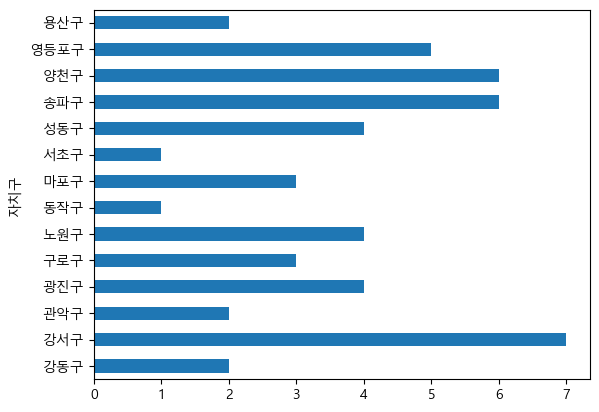

In [54]:
# 자치구별 상위50개 대여소 수

weekend50_tot = weekend50_total.groupby('자치구')['대여 대여소번호'].count()
weekend50_tot.plot(kind='barh')

In [60]:
weekend50_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여 대여소번호   50 non-null     int64  
 1   대여 대여소명    50 non-null     object 
 2   주말         50 non-null     float64
 3   평일         50 non-null     float64
 4   대여소번호      50 non-null     int64  
 5   보관소(대여소)명  50 non-null     object 
 6   자치구        50 non-null     object 
 7   상세주소       50 non-null     object 
 8   위도         50 non-null     float64
 9   경도         50 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.0+ KB


In [65]:
%pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\B8-01\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [67]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[weekend50_total['위도'].mean(),weekend50_total['경도'].mean()],
           zoom_start=12, width=800, height=500)

marker_c = MarkerCluster().add_to(map)

# folium marker 표시
for i in weekend50_total.index:
    sub_lat = weekend50_total.loc[i,'위도']
    sub_lon = weekend50_total.loc[i,'경도']
    shop = [sub_lat,sub_lon]
    sub_name = weekend50_total.loc[i,'대여 대여소명']

    folium.Marker(location=shop, popup=sub_name, icon=folium.Icon(color='red',icon='star')).add_to(marker_c)

map